# Import Modules
You may need to install some of them.

In [35]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    colorview(Gray, img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

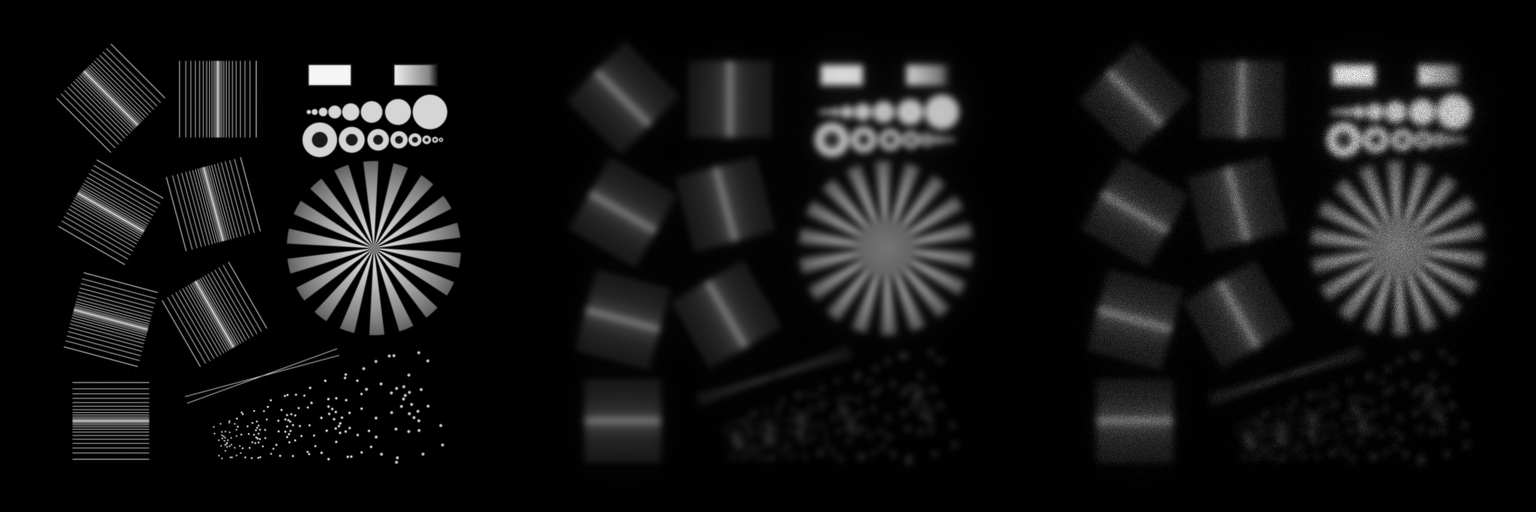

In [36]:
# load test images
img = 300 .* convert(Array{Float32}, channelview(testimage("resolution_test_512")))

psf = generate_psf(size(img), 30)

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2])
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Changing the loss function

  3.350378 seconds (26.00 M allocations: 2.943 GiB, 3.59% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     5.214360e+04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.79e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.27e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.58e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.02e-05 ≰ 0.0e+00
    |g(x)|                 = 2.35e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    10
    f(x) calls:    32
    ∇f(x) calls:   32

  2.804068 seconds (22.86 M allocations: 2.752 GiB, 3.88% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -8.736197e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.86e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.30e-02 ≰ 0.0e+00
 

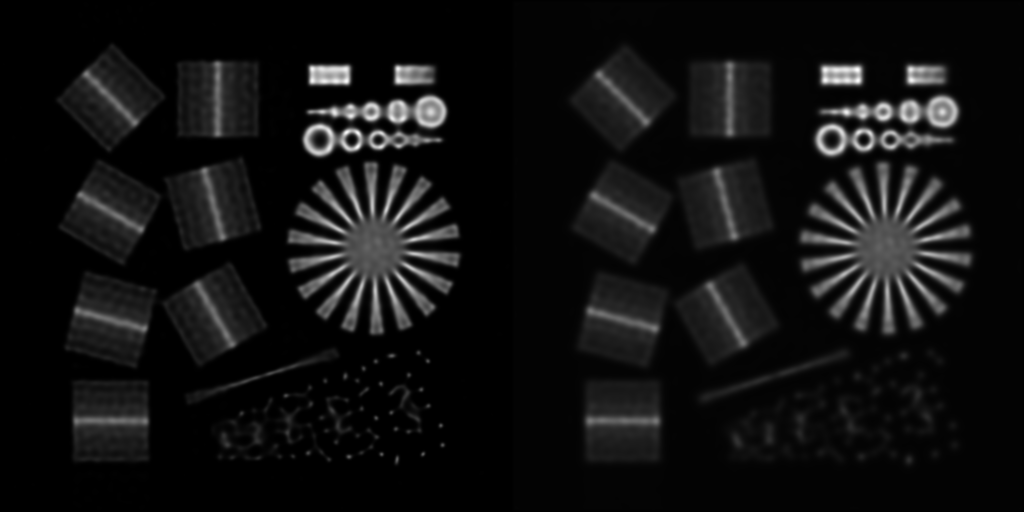

In [37]:
@time resP, optim_res = deconvolution(img_n, psf, loss=Poisson(), iterations=10)
@show optim_res

@time resG, optim_res = deconvolution(img_n, psf, loss=Gauss(), iterations=10)
@show optim_res

h_view(resP, resG)